# Exploring GPT-2

In this Jupyter Notebook, we are exploring the GPT-2 model from Huggingface. 


In [1]:
from transformers import GPT2Tokenizer, GPT2Model, GPT

Let's take the huggingface GPT2 transformers model for a spin.

In [12]:
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = GPT2Model.from_pretrained('gpt2')
text = "Replace me by any text you'd like."
encoded_input = tokenizer(text, return_tensors='pt')
print("=== encoded input ===")
print(encoded_input)
print("=== model output ===")
output = model(**encoded_input)
print(output)

/Users/kapilsharma/opt/anaconda3/lib/python3.9/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


=== encoded input ===
{'input_ids': tensor([[3041, 5372,  502,  416,  597, 2420,  345, 1549,  588,   13]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}
=== model output ===
BaseModelOutputWithPastAndCrossAttentions(last_hidden_state=tensor([[[ 0.1629, -0.2166, -0.1410,  ..., -0.2619, -0.0819,  0.0092],
         [ 0.4628,  0.0248, -0.0785,  ..., -0.0859,  0.5122, -0.3939],
         [-0.0644,  0.1551, -0.6306,  ...,  0.2488,  0.3691,  0.0833],
         ...,
         [-0.5591, -0.4490, -1.4540,  ...,  0.1650, -0.1302, -0.3740],
         [ 0.1400, -0.3875, -0.7916,  ..., -0.1780,  0.1824,  0.2185],
         [ 0.1721, -0.2420, -0.1124,  ..., -0.1068,  0.1205, -0.3213]]],
       grad_fn=<ViewBackward0>), past_key_values=((tensor([[[[-1.0719,  2.4170,  0.9660,  ..., -0.4787, -0.3316,  1.7925],
          [-2.2897,  2.5424,  0.8317,  ..., -0.5299, -2.4828,  1.3537],
          [-2.2856,  2.7125,  2.4725,  ..., -1.4911, -1.8427,  1.6493],
          ...,
          [-3.3203,  2.3325

Let's use the model directly for some text generation

In [14]:
from transformers import pipeline, set_seed
generator = pipeline('text-generation', model='gpt2')
set_seed(42)
generator("Hello, I'm a language model,", max_length=30, num_return_sequences=5)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "Hello, I'm a language model, I'm writing a new language for you. But first, I'd like to tell you about the language itself"},
 {'generated_text': "Hello, I'm a language model, and I'm trying to be as expressive as possible. In order to be expressive, it is necessary to know"},
 {'generated_text': "Hello, I'm a language model, so I don't get much of a license anymore, but I'm probably more familiar with other languages on that"},
 {'generated_text': "Hello, I'm a language model, a functional model... It's not me, it's me!\n\nI won't bore you with how"},
 {'generated_text': "Hello, I'm a language model, not an object model.\n\nIn a nutshell, I need to give language model a set of properties that"}]

We can look at the raw parameter dimensions from the published model on huggingface.

In [15]:
parameters_state_dict = model.state_dict()
for key, value in parameters_state_dict.items():
    print(key, value.size())

wte.weight torch.Size([50257, 768])
wpe.weight torch.Size([1024, 768])
h.0.ln_1.weight torch.Size([768])
h.0.ln_1.bias torch.Size([768])
h.0.attn.c_attn.weight torch.Size([768, 2304])
h.0.attn.c_attn.bias torch.Size([2304])
h.0.attn.c_proj.weight torch.Size([768, 768])
h.0.attn.c_proj.bias torch.Size([768])
h.0.ln_2.weight torch.Size([768])
h.0.ln_2.bias torch.Size([768])
h.0.mlp.c_fc.weight torch.Size([768, 3072])
h.0.mlp.c_fc.bias torch.Size([3072])
h.0.mlp.c_proj.weight torch.Size([3072, 768])
h.0.mlp.c_proj.bias torch.Size([768])
h.1.ln_1.weight torch.Size([768])
h.1.ln_1.bias torch.Size([768])
h.1.attn.c_attn.weight torch.Size([768, 2304])
h.1.attn.c_attn.bias torch.Size([2304])
h.1.attn.c_proj.weight torch.Size([768, 768])
h.1.attn.c_proj.bias torch.Size([768])
h.1.ln_2.weight torch.Size([768])
h.1.ln_2.bias torch.Size([768])
h.1.mlp.c_fc.weight torch.Size([768, 3072])
h.1.mlp.c_fc.bias torch.Size([3072])
h.1.mlp.c_proj.weight torch.Size([3072, 768])
h.1.mlp.c_proj.bias torch.Siz

## Exploring the Positional Embeddings

In [19]:
position_embeddings = model.wpe.weight
position_embeddings

Parameter containing:
tensor([[-1.8821e-02, -1.9742e-01,  4.0267e-03,  ..., -4.3044e-02,
          2.8267e-02,  5.4490e-02],
        [ 2.3959e-02, -5.3792e-02, -9.4879e-02,  ...,  3.4170e-02,
          1.0172e-02, -1.5573e-04],
        [ 4.2161e-03, -8.4764e-02,  5.4515e-02,  ...,  1.9745e-02,
          1.9325e-02, -2.1424e-02],
        ...,
        [-1.7987e-03,  1.6052e-03, -5.5103e-02,  ...,  1.3617e-02,
         -7.1805e-03,  3.7552e-03],
        [ 3.2105e-03,  1.5501e-03, -4.8944e-02,  ...,  2.0725e-02,
         -1.1838e-02, -5.5683e-04],
        [ 2.6610e-04,  3.0272e-03, -1.7086e-03,  ..., -4.6506e-03,
         -2.3541e-03, -5.7855e-03]], requires_grad=True)

Here we plot the heatmap for the position embeddings to showcase some trends that can be seen with naked eye. In addition, we plot a few of these embedding indices i.e. embedding values along the sequence dimension for a few embedding indices.

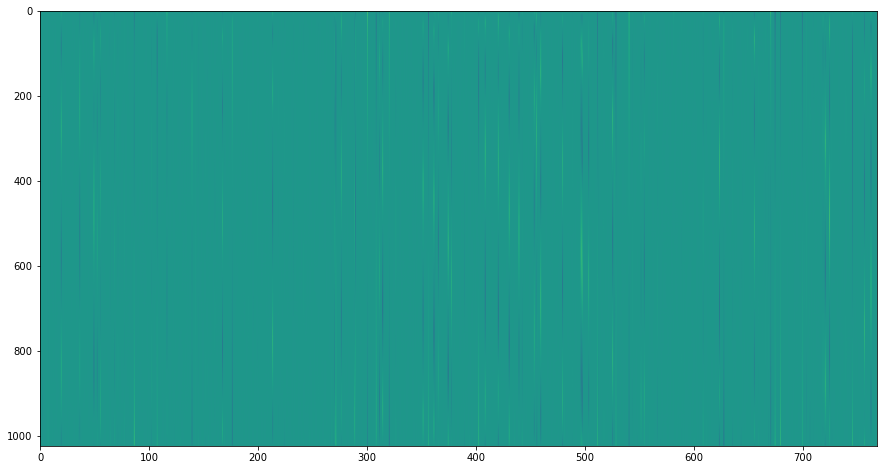

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15, 8))
plt.imshow(position_embeddings.detach().numpy(), aspect='auto')

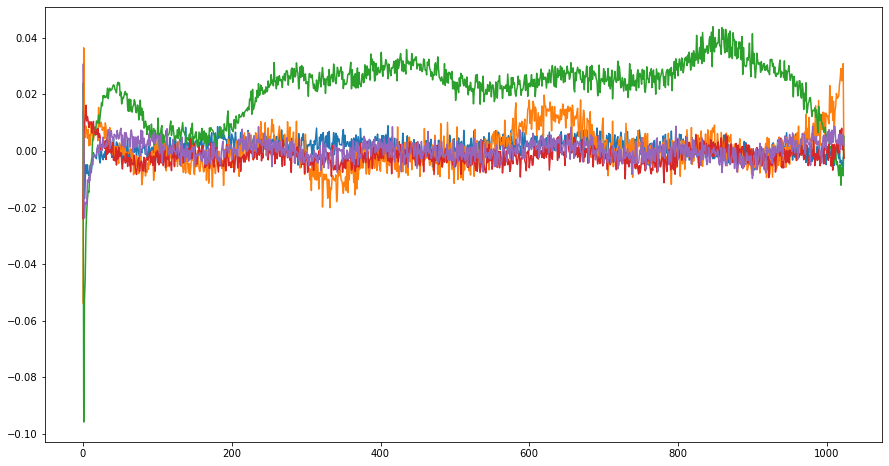

In [31]:
plt.figure(figsize=(15, 8))
plt.plot(position_embeddings.detach().numpy()[:, 100])
plt.plot(position_embeddings.detach().numpy()[:, 200])
plt.plot(position_embeddings.detach().numpy()[:, 250])
plt.plot(position_embeddings.detach().numpy()[:, 400])
plt.plot(position_embeddings.detach().numpy()[:, 500])
